# Лабораторные работы #2 и #3

Предмет: **Интеллектуальные системы АиСИС**

Студент: **Дарковский Илья**

Группа: **ИВМО-01-20**

## Импорты

In [1]:
import numpy as np
from emnist import extract_training_samples
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from classifier import NeuralNetwork as nn

## Лабораторная работа №2

Написать свою нейросеть прямого распространения и обучить её для распознования образов цифр.

### Предобработка данных

In [2]:
N_TRAIN_SAMPLES = 50000
N_TEST_SAMPLES = 2500
N_EPOCHS = 5
RANDOM_SEED = 42

INPUT_NODES = 784
HIDDEN_NODES = (100, 100)
OUT_NODES = 10
LR = 0.05

MIN_VAL = 0.001
MAX_VAL = 0.99

In [3]:
digits, labels = extract_training_samples('digits')

print(digits.shape)
print(labels.shape)

(240000, 28, 28)
(240000,)


In [4]:
def prepare_data(
    X,
    Y,
    start_indx=0,
    end_indx=0,
):
    """
    Склеивание данных и меток с урезанием до требуемого числа.
    Склеиваем для того, чтобы потом можно было их перемешивать. 
    """
    concat_data = []
    for x, y in zip(
        X[start_indx:end_indx],
        Y[start_indx:end_indx],
    ):
        data = x.reshape(INPUT_NODES)
        data = (np.asfarray(data) / 255 * MAX_VAL) + MIN_VAL
        data = np.append(data, y)
        concat_data.append(data)
    return concat_data

In [5]:
train_data = prepare_data(
    X=digits,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=digits,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [6]:
len(train_data), len(test_data)

(50000, 2500)

In [7]:
train_data[0]

array([1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 8.76470588e-03, 8.76470588e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
      

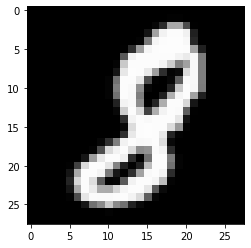

In [8]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [9]:
test_data[0]

array([1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
      

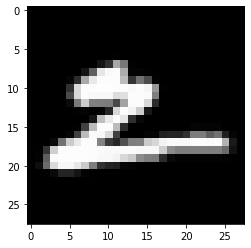

In [10]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

### Обучение

In [11]:
digit_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=HIDDEN_NODES,
    out_nodes=OUT_NODES, 
    lr=LR,
)

In [13]:
for epoch in tqdm(range(N_EPOCHS)):
    np.random.shuffle(train_data)
    for data in tqdm(train_data):
        yi = int(data[-1])
        Y = np.zeros(10) + 0.001
        Y[yi] = 0.99
        X = data[:-1]
        digit_classifier.fit(X, Y)
    print(f'MSE: {digit_classifier.error()[0]}')


MSE: 1.5299266886052554



MSE: 0.0002689868428255607



MSE: 0.000706853058875022



MSE: 0.0009786737212796165



MSE: 0.0008508934805383564



In [15]:
tp = 0
fn = 0
for data in test_data:
    pred = digit_classifier.predict(data[:-1])
    max_indx = np.argmax(pred)
    if (max_indx == data[-1]):
        tp += 1
    else:
        fn += 1
print(f'TPR: {tp / (tp + fn)}')

TPR: 0.9524


In [16]:
digit_classifier.predict(test_data[-1][:-1])

array([[5.82552170e-04],
       [1.55796124e-03],
       [7.52663094e-03],
       [4.47179780e-03],
       [9.75922674e-03],
       [9.96446603e-01],
       [8.37881699e-03],
       [1.22857828e-03],
       [4.22403507e-03],
       [2.33896786e-03]])

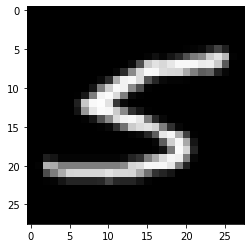

In [17]:
plt.imshow(test_data[-1][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

## Лабораторная работа №3

Написать свою нейросеть прямого распространения и обучить её для распознования образов букв.

### Предобработка данных

In [18]:
letters, labels = extract_training_samples('letters')

print(letters.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)


In [19]:
train_data = prepare_data(
    X=letters,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=letters,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [20]:
len(train_data), len(test_data)

(50000, 2500)

In [21]:
labels.min(), labels.max()

(1, 26)

In [22]:
train_data[0]

array([1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.26470588e-02, 1.65294118e-02, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
      

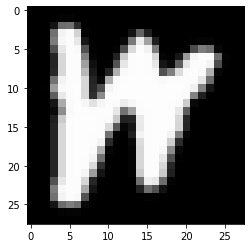

In [23]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [24]:
train_data[0][-1]

23.0

In [25]:
chr(int(train_data[0][-1]) + 64)

'W'

### Обучение

In [33]:
HIDDEN_NODES = (100, 50)
OUT_NODES = 27

letter_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=HIDDEN_NODES,
    out_nodes=OUT_NODES, 
    lr=LR,
)

In [34]:
for epoch in tqdm(range(N_EPOCHS)):
    np.random.shuffle(train_data)
    for data in tqdm(train_data):
        yi = int(data[-1])
        Y = np.zeros(27) + MIN_VAL
        Y[yi] = MAX_VAL
        X = data[:-1]
        letter_classifier.fit(X, Y)
    print(f'MSE: {letter_classifier.error()[0]}')


MSE: 0.09400042392228448



MSE: 0.010364829259846896



MSE: 0.059398425323700474



MSE: 0.8956930788298526



MSE: 0.33146643238094275



In [35]:
tp = 0
fn = 0
for data in test_data:
    pred = letter_classifier.predict(data[:-1])
    max_indx = np.argmax(pred)
    if (max_indx == data[-1]):
        tp += 1
    else:
        fn += 1
print(f'TPR: {tp / (tp + fn)}')

TPR: 0.7564


In [41]:
digit_classifier.predict(test_data[0][:-1])

array([[6.57179444e-03],
       [2.79199204e-02],
       [8.64566279e-03],
       [8.33316091e-02],
       [3.23415994e-03],
       [6.58111687e-01],
       [2.28852250e-02],
       [1.28426895e-01],
       [2.65767678e-04],
       [5.37635673e-03],
       [6.31178495e-03],
       [1.62284477e-03],
       [3.98566098e-03],
       [7.95006355e-03],
       [2.09231940e-03],
       [3.10830318e-03],
       [7.50126047e-03],
       [1.23253702e-01],
       [1.45363950e-02],
       [3.09751866e-02],
       [3.23792642e-03],
       [6.31707666e-03],
       [3.05287492e-03],
       [1.99970299e-03],
       [1.02576518e-03],
       [4.18309682e-03],
       [1.14130989e-02]])

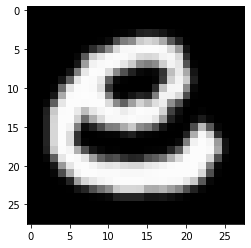

In [40]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [42]:
chr(int(test_data[0][-1]) + 64)

'E'